In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del archivo CSV con las etiquetas
data = pd.read_csv('archive/full_df.csv')

# Visualización de las primeras filas del dataset
data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
# Crear una lista vacía para almacenar todas las categorías  
todas_las_categorias = []  

# Iterar a través de cada registro en la columna  
for registro in data['Left-Diagnostic Keywords']:  
    # Dividir las categorías por el delimitador (por ejemplo, una coma)  
    categorias = registro.split(',')  
    # Añadir las categorías a la lista  
    todas_las_categorias.extend(categorias)  

# Obtener solo las categorías únicas usando set  
categorias_unicas = set(todas_las_categorias)  

# Convertir el set de vuelta a una lista (opcional)  
categorias_unicas = list(categorias_unicas)  

# Imprimir las categorías únicas  
print(categorias_unicas)  

['proliferative diabetic retinopathy，hypertensive retinopathy', 'dry age-related macular degeneration', 'tessellated fundus', 'lens dust，macular epiretinal membrane', 'atrophy', 'optic disk photographically invisible', 'macular epiretinal membrane，glaucoma', 'moderate non proliferative retinopathy，branch retinal vein occlusion', 'diabetic retinopathy', 'macular epiretinal membrane，vessel tortuosity', 'suspected retinal vascular sheathing', 'diabetic retinopathy，wet age-related macular degeneration', 'mild nonproliferative retinopathy，myelinated nerve fibers', 'dry age-related macular degeneration，hypertensive retinopathy', 'proliferative diabetic retinopathy', 'macular epiretinal membrane，severe nonproliferative retinopathy', 'epiretinal membrane，epiretinal membrane，lens dust', 'lens dust，mild nonproliferative retinopathy，myelinated nerve fibers', 'cataract，suspected glaucoma', 'hypertensive retinopathy，mild nonproliferative retinopathy', 'laser spot，moderate non proliferative retinopa

C:\Users\lucelayule001\AppData\Local\Temp\ipykernel_19772\4284550200.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


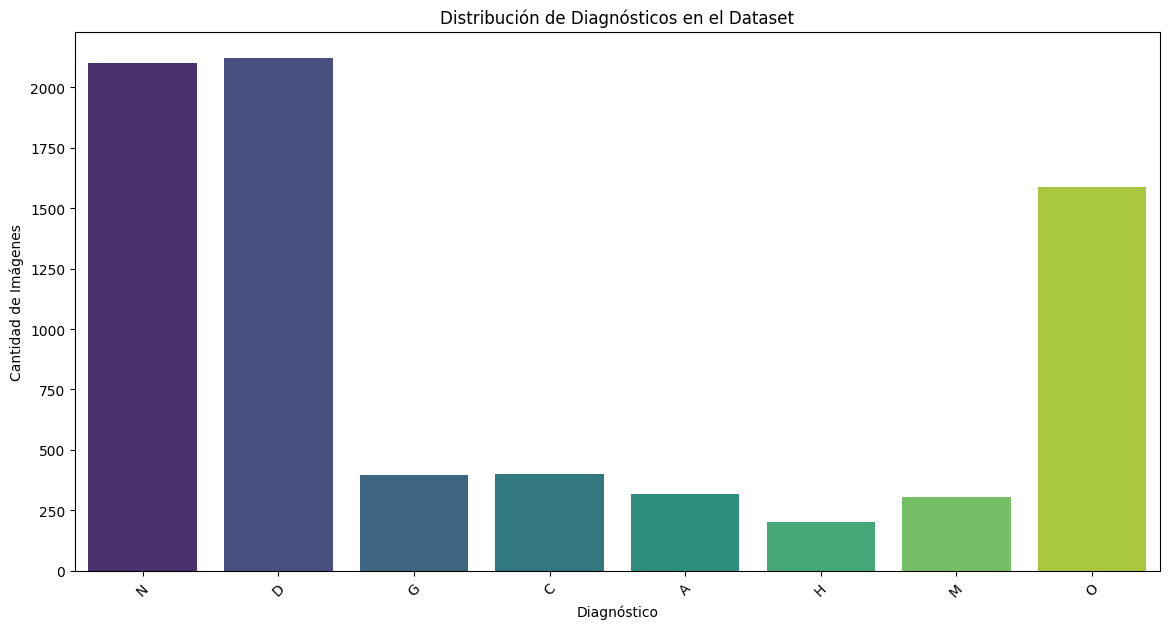

In [ ]:
# Seleccionar las columnas que contienen los diagnósticos
diagnosis_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Sustituir por los nombres reales de las columnas

# Sumar los valores de cada columna para contar las ocurrencias de cada diagnóstico
disease_counts = data[diagnosis_columns].sum()

# Gráfica de barras para visualizar la distribución
plt.figure(figsize=(14, 7))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.title('Distribución de Diagnósticos en el Dataset')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45)
plt.show()


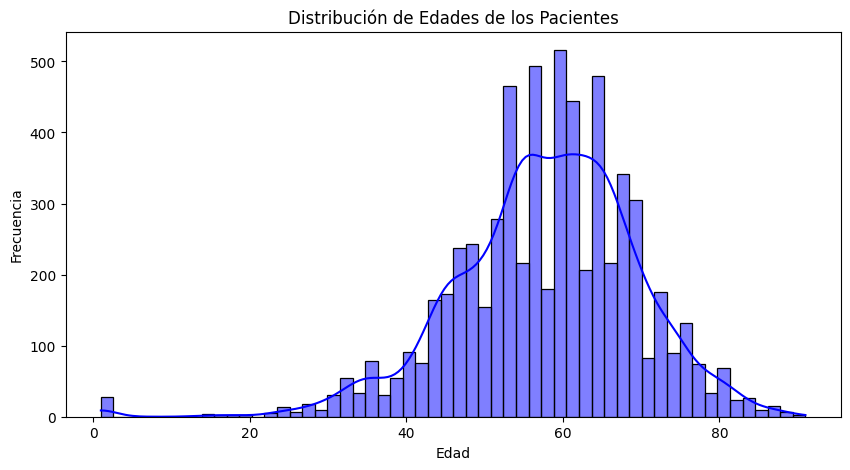

In [16]:
# Histograma de edades
plt.figure(figsize=(10, 5))
sns.histplot(data['Patient Age'], kde=True, color='blue')
plt.title('Distribución de Edades de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
data
diagnosis_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'] 
data_long = data.melt(id_vars=['Patient Age'], value_vars=diagnosis_columns, var_name='diagnosis', value_name='presence')
data_long = data_long[data_long['presence'] == 1]

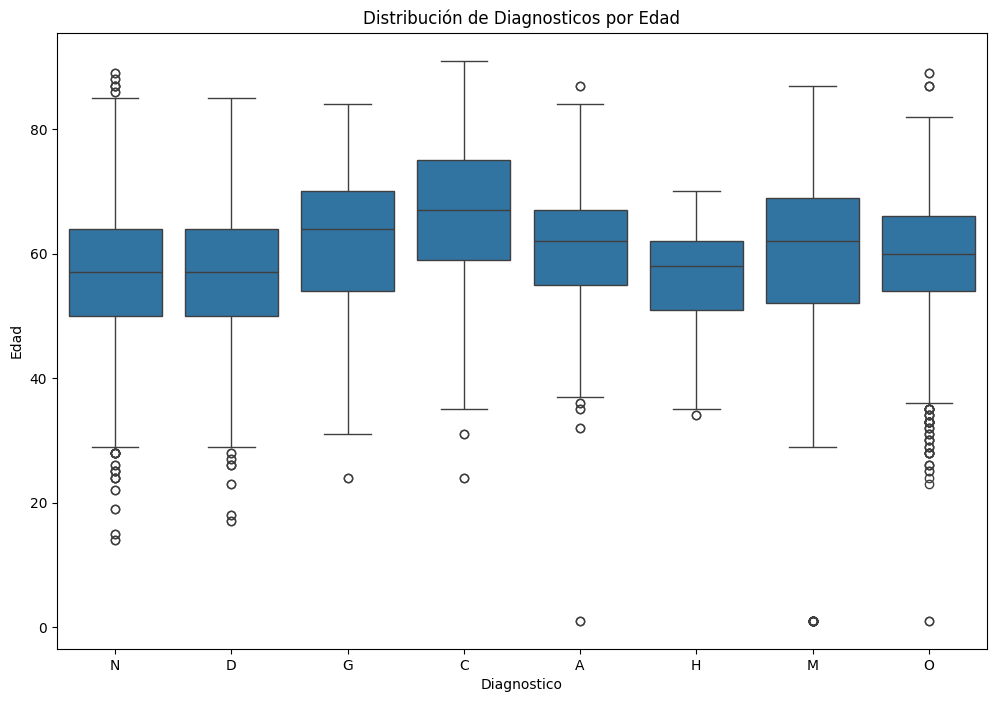

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='diagnosis', y='Patient Age', data=data_long)
plt.title('Distribución de Diagnosticos por Edad')
plt.xlabel('Diagnostico')
plt.ylabel('Edad')
plt.show()